In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

In [100]:
df=pd.read_csv('diminos_data.csv')
df.head(7)

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
5,1523116,2023-03-01 00:09:44,2023-03-01 00:25:17.088349
6,1523117,2023-03-01 00:11:09,2023-03-01 00:41:54.245295


In [101]:
df['order_id'].count()

np.int64(15000)

In [102]:
df.describe()

,order_id
count,1.500000e+04
mean,1.530610e+06
std,4.330271e+03
min,1.523111e+06
25%,1.526861e+06
50%,1.530610e+06
75%,1.534360e+06
max,1.538110e+06


In [103]:
df.tail(10)

,order_id,order_placed_at,order_delivered_at
14990,1538101,2023-03-27 23:29:20,2023-03-27 23:44:46.861328
14991,1538102,2023-03-27 23:30:46,2023-03-27 23:45:57.990761
14992,1538103,2023-03-27 23:31:36,2023-03-27 23:46:40.660440
14993,1538104,2023-03-27 23:31:53,2023-03-27 23:48:56.297534
14994,1538105,2023-03-27 23:32:06,2023-03-27 23:47:25.224968
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358
14999,1538110,2023-03-27 23:58:20,2023-03-28 00:13:42.499311


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [105]:
# formatting (changing) to datetime (dtype)

df['order_placed_at']=pd.to_datetime(df['order_placed_at'])
df['order_delivered_at']=pd.to_datetime(df['order_delivered_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [106]:
#extracting date and time from datetime

df['deli_time_min'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds()/60

df[['deli_time_min']].head()

df.head()

,order_id,order_placed_at,order_delivered_at,deli_time_min
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984


In [107]:
# Splitting date and time from datetime columns

# placed=df['order_placed_at']
# deliver=df['order_delivered_at']

# placed_date=list(map(lambda x:x.split(" ")[0],placed))
# delivered_date=list(map(lambda x:x.split(" ")[0],deliver))


# placed_time=list(map(lambda x:x.split(" ")[1],placed))
# delivered_time=list(map(lambda x:x.split(" ")[1],deliver))

In [108]:
# df['placed_date']=placed_date
# df['delivered_date']=delivered_date 
# df['placed_time']=placed_time
# df['delivered_time']=delivered_time
# df.head()

In [109]:
quan=df['deli_time_min'].quantile(0.95)
quan

np.float64(27.261043996666658)

In [110]:
df.describe()

,order_id,order_placed_at,order_delivered_at,deli_time_min
count,1.500000e+04,15000,15000,15000.000000
mean,1.530610e+06,2023-03-14 10:49:21.257533184,2023-03-14 11:09:51.220893184,20.499389
min,1.523111e+06,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,15.000010
25%,1.526861e+06,2023-03-07 15:57:25,2023-03-07 16:20:38.480371200,15.274826
50%,1.530610e+06,2023-03-14 09:32:06.500000,2023-03-14 09:55:10.638778880,15.797986
75%,1.534360e+06,2023-03-21 07:07:15.500000,2023-03-21 07:25:22.135336704,17.279661
max,1.538110e+06,2023-03-27 23:58:20,2023-03-29 02:42:50.645252,7299.831375
std,4.330271e+03,NaN,NaN,96.160362


In [111]:
time=df.groupby('order_id')['deli_time_min']

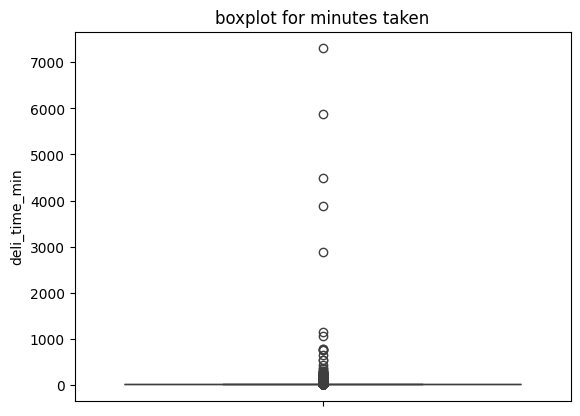

In [112]:
# findimg outliers

sns.boxplot(data=df['deli_time_min'])
plt.title('boxplot for minutes taken')
plt.show()


In [113]:
# removing outliers

df_clean=df[df['deli_time_min']<=120]
df_clean.describe()


,order_id,order_placed_at,order_delivered_at,deli_time_min
count,1.493100e+04,14931,14931,14931.000000
mean,1.530614e+06,2023-03-14 10:58:45.495412224,2023-03-14 11:16:31.133552128,17.760636
min,1.523111e+06,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,15.000010
25%,1.526866e+06,2023-03-07 16:12:29,2023-03-07 16:27:45.128286976,15.272876
50%,1.530617e+06,2023-03-14 09:48:59,2023-03-14 10:04:46.102244096,15.789953
75%,1.534368e+06,2023-03-21 07:34:30,2023-03-21 07:50:09.537787392,17.241652
max,1.538110e+06,2023-03-27 23:58:20,2023-03-28 00:13:42.499311,118.026424
std,4.331317e+03,NaN,NaN,7.144206


In [114]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14931 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            14931 non-null  int64         
 1   order_placed_at     14931 non-null  datetime64[ns]
 2   order_delivered_at  14931 non-null  datetime64[ns]
 3   deli_time_min       14931 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 583.2 KB


<function matplotlib.pyplot.show(close=None, block=None)>

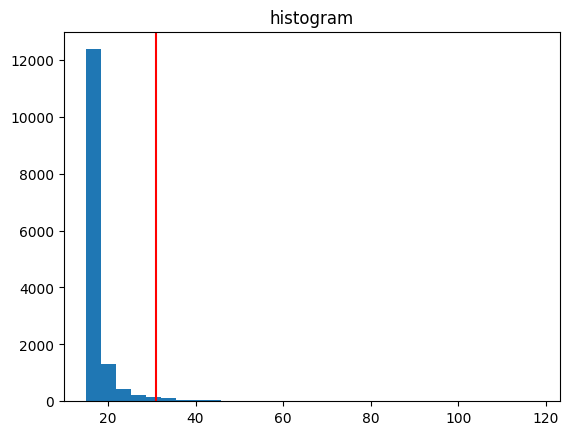

In [115]:
plt.hist(df_clean['deli_time_min'],bins=30)
plt.axvline(31,linestyle='-',color='red')
plt.title('histogram')
plt.show

In [116]:
# average delivery time after removing outliers
avg_time=df_clean['deli_time_min'].mean()
avg_time

np.float64(17.760635663835867)

In [117]:
df_clean['bad_time']=df['deli_time_min']>31
df_clean

C:\Users\Yuvraj\AppData\Local\Temp\ipykernel_13576\3984780985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['bad_time']=df['deli_time_min']>31


,order_id,order_placed_at,order_delivered_at,deli_time_min,bad_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719,False
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754,False
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856,False
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,True
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984,False
...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,15.540156,False
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,16.744549,False
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,15.411271,False
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,15.963506,False


In [163]:
breach_rate=df_clean['bad_time'].mean()*100
breach_rate

np.float64(3.2683678253298507)

In [118]:
df_clean['time_hour']=df_clean['order_placed_at'].dt.hour
df_clean['day']=df_clean['order_placed_at'].dt.day_name()
df_clean.head()

C:\Users\Yuvraj\AppData\Local\Temp\ipykernel_13576\1165693869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['time_hour']=df_clean['order_placed_at'].dt.hour
C:\Users\Yuvraj\AppData\Local\Temp\ipykernel_13576\1165693869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['day']=df_clean['order_placed_at'].dt.day_name()


,order_id,order_placed_at,order_delivered_at,deli_time_min,bad_time,time_hour,day
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719,False,0,Wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754,False,0,Wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856,False,0,Wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,True,0,Wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984,False,0,Wednesday


In [144]:
df_clean.groupby('day')['deli_time_min'].describe()


,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Friday,2216.0,17.536175,6.072956,15.000660,15.263089,15.751005,17.241315,97.184608
Monday,2244.0,17.814426,6.765252,15.000070,15.287839,15.830341,17.273539,113.585262
Saturday,2201.0,17.878277,8.078968,15.000029,15.275977,15.778036,17.155289,111.037067
Sunday,2177.0,17.595514,6.655645,15.000048,15.280401,15.771906,17.152793,111.514582
Thursday,2271.0,17.820270,7.792529,15.000010,15.260175,15.782959,17.157324,118.026424
Tuesday,1573.0,17.983598,7.034612,15.000503,15.273869,15.808342,17.495347,99.085615
Wednesday,2249.0,17.756675,7.359572,15.000564,15.271266,15.825558,17.288234,115.342774


In [137]:
defect=df_clean[df_clean['bad_time']]
defect.describe()

,order_id,order_placed_at,order_delivered_at,deli_time_min,time_hour
count,4.880000e+02,488,488,488.000000,488.000000
mean,1.530828e+06,2023-03-14 20:24:32.221311488,2023-03-14 21:13:11.820940800,48.659994,11.700820
min,1.523114e+06,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,31.017259,0.000000
25%,1.526939e+06,2023-03-07 19:28:06.750000128,2023-03-07 20:23:29.659190016,34.348928,6.000000
50%,1.531205e+06,2023-03-15 12:51:19.500000,2023-03-15 13:33:51.157242624,41.003462,12.000000
75%,1.534529e+06,2023-03-21 14:26:38,2023-03-21 15:07:38.042166272,56.710562,17.000000
max,1.538064e+06,2023-03-27 22:04:53,2023-03-27 22:55:03.230465,118.026424,23.000000
std,4.258125e+03,NaN,NaN,19.622034,7.028589


In [145]:
defect.groupby('day')['deli_time_min'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Friday,65.0,45.247042,16.062038,31.035385,33.389685,39.115680,50.640845,97.184608
Monday,82.0,45.983009,16.047900,31.305811,35.605539,41.162805,50.786878,113.585262
Saturday,69.0,53.910518,23.335377,31.082561,34.208104,45.939654,68.072933,111.037067
Sunday,67.0,48.114513,17.443087,31.040440,34.280097,41.372284,56.906944,111.514582
Thursday,75.0,50.763150,23.126240,31.029164,34.517916,40.930494,59.645262,118.026424
Tuesday,60.0,46.872813,15.740614,31.017259,34.283328,42.069049,55.791990,99.085615
Wednesday,70.0,49.590134,22.515441,31.439466,34.943283,40.456974,53.211732,115.342774


In [192]:
day=defect[defect['day']=='Monday']
day

,order_id,order_placed_at,order_delivered_at,deli_time_min,bad_time,time_hour,day
2800,1525911,2023-03-06 00:17:33,2023-03-06 00:58:07.812493,40.580208,True,0,Monday
2830,1525941,2023-03-06 01:37:49,2023-03-06 02:37:39.343041,59.839051,True,1,Monday
2868,1525979,2023-03-06 03:11:58,2023-03-06 04:03:14.391881,51.273198,True,3,Monday
2907,1526018,2023-03-06 05:02:12,2023-03-06 05:39:37.916554,37.431943,True,5,Monday
2912,1526023,2023-03-06 05:15:38,2023-03-06 06:46:14.950846,90.615847,True,5,Monday
...,...,...,...,...,...,...,...
14841,1537952,2023-03-27 16:42:37,2023-03-27 17:43:13.294744,60.604912,True,16,Monday
14855,1537966,2023-03-27 17:16:14,2023-03-27 17:49:07.476278,32.891271,True,17,Monday
14899,1538010,2023-03-27 19:31:50,2023-03-27 20:08:26.866824,36.614447,True,19,Monday
14939,1538050,2023-03-27 21:17:20,2023-03-27 21:54:03.464048,36.724401,True,21,Monday


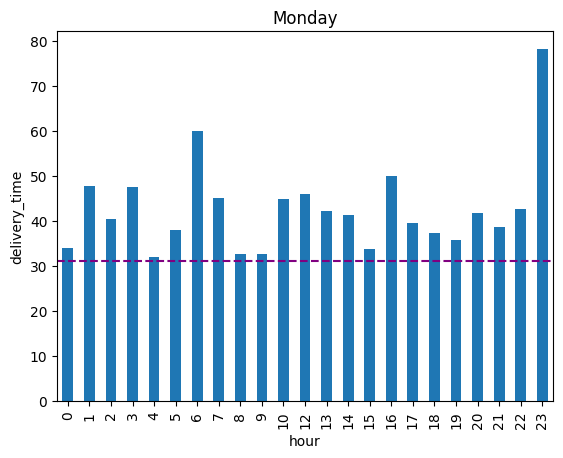

In [204]:
d=day.groupby('time_hour')['deli_time_min'].quantile()
d.plot(kind='bar')
plt.ylabel('delivery_time')
plt.xlabel('hour')
plt.title('Monday')
plt.axhline(31,linestyle='--',color='purple')
plt.show()

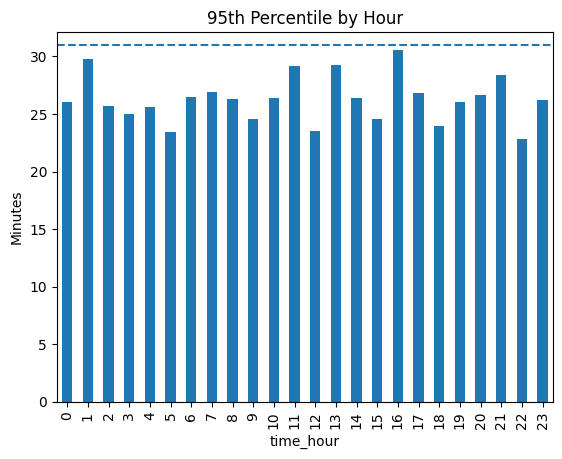

In [160]:
hourly_p95 = df_clean.groupby('time_hour')['deli_time_min'].quantile(0.95)

hourly_p95.plot(kind='bar')
plt.axhline(31, linestyle='--')
plt.title("95th Percentile by Hour")
plt.ylabel("Minutes")
plt.show()

In [174]:
# Business Summary Table

summary = {"Total Orders": df_clean['order_id'].count(),"Avg Delivery Time": avg_time,
    "95th Percentile": quan,
    "SLA Breach %": breach_rate
}

pd.DataFrame(summary, index=["Value"])

,Total Orders,Avg Delivery Time,95th Percentile,SLA Breach %
Value,14931,17.760636,27.261044,3.268368


# Business Insights & Suggestions to Keep the Store Up and Running

- **Currently compliance is healthy**– the store meets the 95th percentile requirement, indicating strong overall delivery performance.
- **Business risk is concentrated in the slowest 5% of orders,** not the average deliveries; controlling outliers protects the franchise.
- **Peak hours (lunch and dinner) are the primary contributors to delays,**requiring proactive staffing and dispatch planning.
- **A small number of extreme delays can break the SLA,** even if most orders are on time—these must be tracked daily.
- **Set an internal alert threshold at 28 minutes** to take corrective action before breaching the 31-minute promise.
- **Increase delivery staff dynamically during high-volume periods** instead of maintaining a flat 24×7 staffing model.
- **Limit delivery radius during rush hours** to prevent long-distance orders from impacting the percentile metric.
- **Monitor individual rider performance** and assign high-risk orders to consistently fast delivery partners.
- **Shift customer demand to off-peak hours using promotions,** reducing operational pressure during peak times.
- **Implement daily 95th percentile monitoring rather than monthly reviews,** as percentile metrics can deteriorate quickly with volume growth.
- **Days on which chances of breach are high** 1.Mondays, 2.Thursdays, 3.Wednesdays